In [1]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("Lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\User\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [4]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

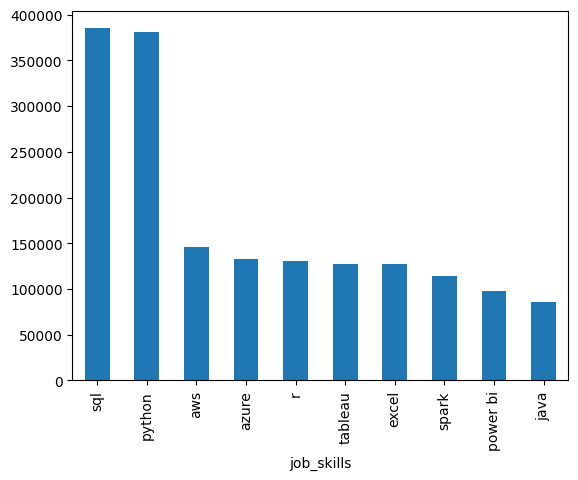

In [6]:
df_exploded['job_skills'].value_counts().head(10).plot.bar()

In [9]:
skills_count = df_exploded.groupby(['job_skills', 'job_title_short']).size().unstack().fillna(0)

In [10]:
type(skills_count)

pandas.core.frame.DataFrame

In [17]:
df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

TypeError: DataFrame.reset_index() got an unexpected keyword argument 'name'

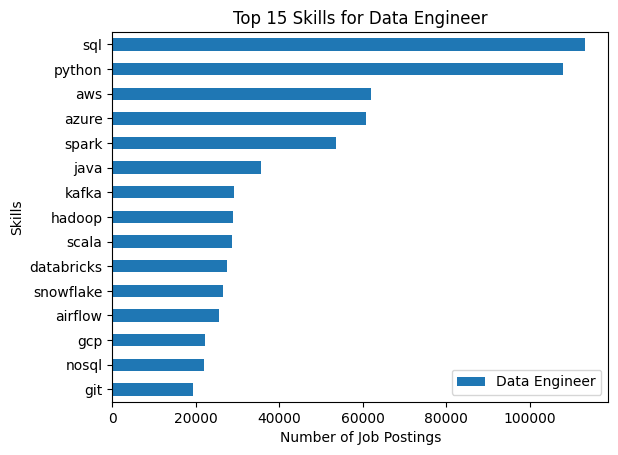

In [28]:
job_title = 'Data Engineer'
top_skills =15

df_skill_final = df_skills_count[['job_skills', job_title]].sort_values(by=job_title, ascending=False).head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y=job_title)
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}')
plt.xlabel('Number of Job Postings')
plt.ylabel('Skills')
plt.show()